# Importing necessary libraries and downloading files

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


# Importing dataset

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'  #to suppress SettingWithCopyWarning

#Reading the dataset
dataset = pd.read_csv("fer2013.csv")

#Obtaining train data where usage is "Training"
train = dataset[dataset["Usage"] == "Training"]

#Obtaining test data where usage is "PublicTest"
test = dataset[dataset["Usage"] == "PublicTest"]

#Converting " " separated pixel values to list
train['pixels'] = train['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
test['pixels'] = test['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))

# Preparing Training dataset

In [3]:
X_train = train.iloc[:, 1].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1].values
y_test = test.iloc[:, 0].values

#np.vstack stack arrays in sequence vertically (picking element row wise)
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)


#Reshape X_train, y_train,X_test,y_test in desired formats
X_train = np.reshape(X_train, (X_train.shape[0],48,48,1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
X_test = np.reshape(X_test, (X_test.shape[0],48,48,1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print("shape of X_train and y_train is " + str(X_train.shape) +" and " + str(y_train.shape) +" respectively.")
print("shape of X_test and y_test is " + str(X_test.shape) +" and " + str(y_test.shape) +" respectively.")

shape of X_train and y_train is (28709, 48, 48, 1) and (28709, 1) respectively.
shape of X_test and y_test is (3589, 48, 48, 1) and (3589, 1) respectively.


In [4]:
# Change to float datatype
train_data = X_train.astype('float32')
test_data = X_test.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)

# Getting number of classes and input_shape

In [5]:
# Find the unique numbers from the train labels

classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


# Defining name of emotions

In [6]:
#Defining labels 

def get_label(argument):
    labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad' , 5:'Surprise', 6:'Neutral'}
    return(labels.get(argument, "Invalid emotion"))

# Plotting an image each from train and test set

Text(0.5,1,'Ground Truth : Surprise')

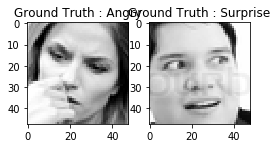

In [7]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(np.squeeze(X_train[2,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_train[0]))))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(np.squeeze(X_test[1500,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_test[1500]))))

# Defining model architecture

In [8]:
def createModel():
    
    #Model Initialization
    model = Sequential() 
    
    #Adding Input Layer
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    
    #Adding more layers
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    #Flattening
    model.add(Flatten())
    
    #Adding fully connected layer
    model.add(Dense(512, activation='relu'))
    
    model.add(Dropout(0.6))
    
    #Adding Output Layer
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

# Creating and training model

In [9]:
#Creating model

model1 = createModel()
batch_size = 256
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        36928     
______________________________________

In [10]:
#Training our model
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))


Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 370s 13ms/step - loss: 1.8227 - accuracy: 0.2453 - val_loss: 1.8194 - val_accuracy: 0.2483
Epoch 2/100
28709/28709 [==============================] - 369s 13ms/step - loss: 1.7435 - accuracy: 0.2892 - val_loss: 1.6888 - val_accuracy: 0.3330
Epoch 3/100
28709/28709 [==============================] - 407s 14ms/step - loss: 1.5901 - accuracy: 0.3793 - val_loss: 1.4930 - val_accuracy: 0.4335
Epoch 4/100
28709/28709 [==============================] - 417s 15ms/step - loss: 1.4838 - accuracy: 0.4282 - val_loss: 1.3855 - val_accuracy: 0.4714
Epoch 5/100
28709/28709 [==============================] - 407s 14ms/step - loss: 1.3939 - accuracy: 0.4647 - val_loss: 1.3268 - val_accuracy: 0.4937
Epoch 6/100
28709/28709 [==============================] - 376s 13ms/step - loss: 1.3329 - accuracy: 0.4874 - val_loss: 1.2914 - val_accuracy: 0.5029
Epoch 7/100
28709/28709 [=========================

Epoch 54/100
28709/28709 [==============================] - 286s 10ms/step - loss: 0.7159 - accuracy: 0.7319 - val_loss: 1.2842 - val_accuracy: 0.6133
Epoch 55/100
28709/28709 [==============================] - 289s 10ms/step - loss: 0.7138 - accuracy: 0.7338 - val_loss: 1.1752 - val_accuracy: 0.6133
Epoch 56/100
28709/28709 [==============================] - 291s 10ms/step - loss: 0.7055 - accuracy: 0.7380 - val_loss: 1.1779 - val_accuracy: 0.6149
Epoch 57/100
28709/28709 [==============================] - 286s 10ms/step - loss: 0.7106 - accuracy: 0.7382 - val_loss: 1.3669 - val_accuracy: 0.6183
Epoch 58/100
28709/28709 [==============================] - 288s 10ms/step - loss: 0.6942 - accuracy: 0.7412 - val_loss: 1.1862 - val_accuracy: 0.6121
Epoch 59/100
28709/28709 [==============================] - 286s 10ms/step - loss: 0.6987 - accuracy: 0.7384 - val_loss: 1.2465 - val_accuracy: 0.6021
Epoch 60/100
28709/28709 [==============================] - 285s 10ms/step - loss: 0.6936 - ac

# Evaluating model and plotting curves

In [11]:
#Evaluating model performance

model1.evaluate(test_data, test_labels_one_hot)

3589/3589 [==============================] - 9s 3ms/step


[1.2742249553799463, 0.6090832948684692]

Text(0.5,1,'Accuracy Curves')

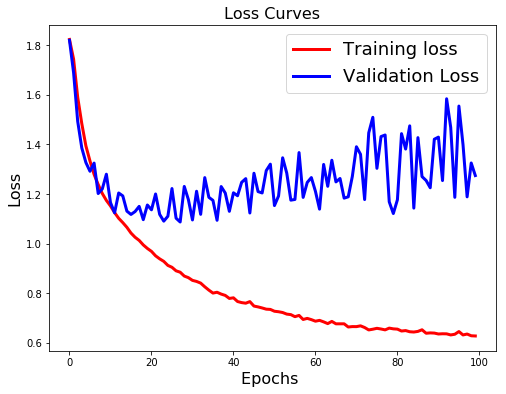

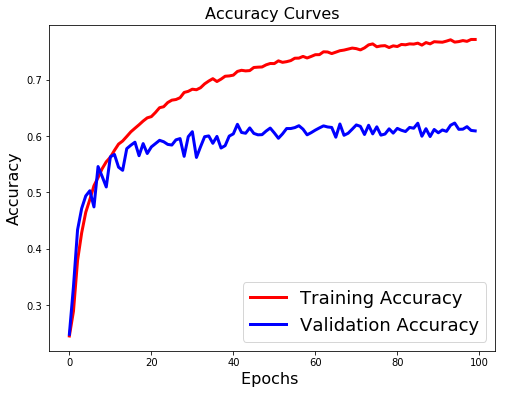

In [13]:
#Plotting accuracy and loss curves for 1st model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Model is getting overfitted so we require data augmentation

# Data augmentation

In [14]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)     # randomly flip images

# Creating and training Augmented model

In [15]:
#Creating Augmented model and training(fitting)

model2 = createModel()
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 256
epochs = 100

# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              )

Epoch 1/100
113/113 [==============================] - 308s 3s/step - loss: 1.8322 - accuracy: 0.2439 - val_loss: 1.8052 - val_accuracy: 0.2488
Epoch 2/100
113/113 [==============================] - 303s 3s/step - loss: 1.7733 - accuracy: 0.2629 - val_loss: 1.6789 - val_accuracy: 0.3266
Epoch 3/100
113/113 [==============================] - 295s 3s/step - loss: 1.7131 - accuracy: 0.3072 - val_loss: 1.6038 - val_accuracy: 0.3745
Epoch 4/100
113/113 [==============================] - 295s 3s/step - loss: 1.6518 - accuracy: 0.3453 - val_loss: 1.5018 - val_accuracy: 0.4179
Epoch 5/100
113/113 [==============================] - 297s 3s/step - loss: 1.5734 - accuracy: 0.3856 - val_loss: 1.4017 - val_accuracy: 0.4617
Epoch 6/100
113/113 [==============================] - 297s 3s/step - loss: 1.5208 - accuracy: 0.4097 - val_loss: 1.3543 - val_accuracy: 0.4790
Epoch 7/100
113/113 [==============================] - 295s 3s/step - loss: 1.4701 - accuracy: 0.4302 - val_loss: 1.3225 - val_accuracy:

113/113 [==============================] - 381s 3s/step - loss: 1.0811 - accuracy: 0.5961 - val_loss: 1.0725 - val_accuracy: 0.6016
Epoch 57/100
113/113 [==============================] - 357s 3s/step - loss: 1.0775 - accuracy: 0.5984 - val_loss: 1.0302 - val_accuracy: 0.6108
Epoch 58/100
113/113 [==============================] - 360s 3s/step - loss: 1.0771 - accuracy: 0.5973 - val_loss: 1.0437 - val_accuracy: 0.6080
Epoch 59/100
113/113 [==============================] - 434s 4s/step - loss: 1.0726 - accuracy: 0.6002 - val_loss: 1.0451 - val_accuracy: 0.6149
Epoch 60/100
113/113 [==============================] - 384s 3s/step - loss: 1.0778 - accuracy: 0.5992 - val_loss: 1.0994 - val_accuracy: 0.6004
Epoch 61/100
113/113 [==============================] - 399s 4s/step - loss: 1.0810 - accuracy: 0.5961 - val_loss: 1.0282 - val_accuracy: 0.6188
Epoch 62/100
113/113 [==============================] - 450s 4s/step - loss: 1.0701 - accuracy: 0.6023 - val_loss: 1.0148 - val_accuracy: 0.619

# Evaluating 2nd model and plotting curves

In [16]:
#Evaluating model performance

model2.evaluate(test_data, test_labels_one_hot)

3589/3589 [==============================] - 12s 3ms/step


[1.039063969173947, 0.6163276433944702]

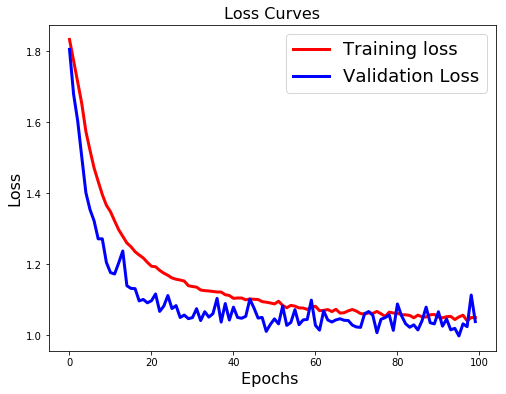

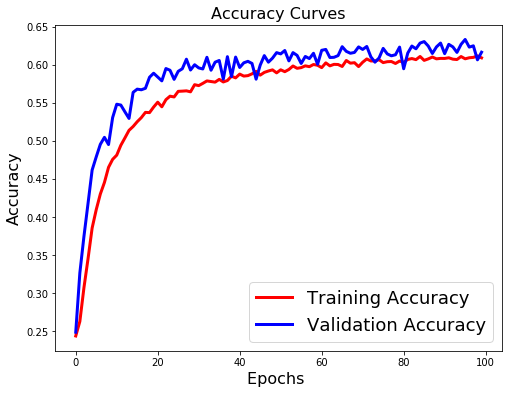

In [18]:
# Plotting accuracy and loss curves for Augmented model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.savefig('curves/loss_mymodel_augmented.png')  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.savefig('curves/accuracy_mymodel_augmented.png')

# Saving our Model

In [19]:
#Saving our model

model2.save('trained models/my_model_augmented.h5')

# Cropping Image to get face

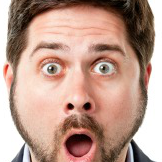

In [20]:
#Cropping image

from PIL import Image
import cv2
import matplotlib.pyplot as plt
from IPython.display import display

img = Image.open("images/surprise.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(np.asarray(img), 1.3, 5)
for (x, y, w, h) in faces:
  if len(faces) == 1: #Use simple check if one face is detected, or multiple (measurement error unless multiple persons on image)
    crop_img = img.crop((x,y,x+w,y+h))
  else:
    print("multiple faces detected, passing over image")
display(crop_img)

In [21]:
#Resizing image to required size and processing
test_image = crop_img.resize((48,48),Image.ANTIALIAS)
test_image = np.array(test_image)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#scale pixels values to lie between 0 and 1 because we did same to our train and test set
gray = gray/255

#reshaping image (-1 is used to automatically fit an integer at it's place to match dimension of original image)
gray = gray.reshape(-1, 48, 48, 1)

res = model2.predict(gray)

#argmax returns index of max value
result_num = np.argmax(res)

print("Probabilities are " + str(res[0])+"\n")
print("Emotion is "+get_label(result_num))

Probabilities are [6.4138020e-03 5.0105217e-07 1.4383329e-01 7.1366168e-07 9.3196859e-06
 8.4974182e-01 4.7350980e-07]

Emotion is Surprise


# Prediction using Pre-Trained Model

In [23]:
from keras.models import load_model
pretrained_model = load_model("trained models/fer2013_mini_XCEPTION.99-0.65.hdf5")

F:\anaconda\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [24]:
#Resizing image to required size
test_image = crop_img.resize((64,64),Image.ANTIALIAS)

#Converting image to array
test_image = np.array(test_image)

#converting to grayscale
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#scale pixels values to lie between 0 and 1 because we did same to our train and test set
gray = gray/255

#reshaping image (-1 is used to automatically fit an integer at it's place to match dimension of original image)
gray = gray.reshape(-1, 64, 64, 1)

res = pretrained_model.predict(gray)

#argmax returns index of max value
result_num = np.argmax(res[0])

# print predictions
print("\nProbabilities are " + str(res[0])+"\n")
print("Emotion is "+ get_label(result_num))


Probabilities are [8.6809462e-03 5.2054406e-07 2.3409235e-01 5.6617941e-06 8.5717824e-04
 7.5634432e-01 1.9050747e-05]

Emotion is Surprise
